<a href="https://colab.research.google.com/github/May-Moon-Colab/Business-Analytics/blob/main/Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASE STUDY: Credit Cards #1
Description:

A data set with Credit Card applicants
  1. Determine the optimal number of segments for the dataset
  2. Use Gaussian Mixture Model
  3. Interpret the segments and name them according to their characteristics

#Directory, Libraries and Data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model

/content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model


In [7]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [4]:
#Load the data
df = pd.read_csv("CreditCard.csv")
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#Data Preparation

In [5]:
#Transform character variables
df = pd.get_dummies(df, drop_first= True)
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0


#Gaussian Mixture Model

Text(0.5, 0, 'Number of Components')

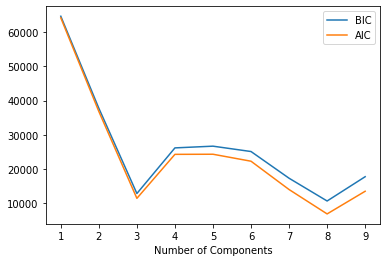

In [8]:
#Finding optimal number of clusters
#Preprare
n_components = np.arange(1,10)
#Create GMM Model
models = [GaussianMixture (n_components = n,
                           random_state = 1502).fit(df) for n in n_components]

  #Plot
plt.plot(n_components,
        [m.bic(df) for m in models],
        label = 'BIC')
plt.plot(n_components,
         [m.aic(df) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('Number of Components')                         

In [9]:
#Gaussian Mixture Model
model = GaussianMixture(n_components = 3,
                        random_state = 1502).fit(df)


#Interpretation

In [11]:
#Predict the cluster for each customer
cluster = pd.Series(model.predict(df))
cluster[:2]

0    2
1    2
dtype: int64

In [12]:
#Create Cluster variable
df['cluster'] = cluster
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0,2
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0,2


In [13]:
#how many people per cluster
df.cluster.value_counts()

2    720
1    303
0    296
Name: cluster, dtype: int64

In [14]:
#interpretacion
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,:-1].columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921
2,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000


In [ ]:
#Names 
#Cluster 0: Non-credit Users
#Cluster 1: Successful entrepreneurs
#Cluster 2: young employees